<a href="https://colab.research.google.com/github/Samin-Yasar-CSE/basic-image-cartoonification/blob/main/image_processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Load Image

def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


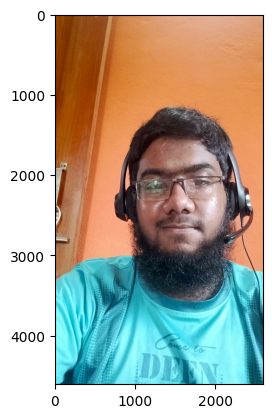

In [117]:
from google.colab import drive
drive.mount('/content/drive')

filename = "/content/drive/MyDrive/your_image.jpg"
img = read_file(filename)
img = cv2.resize(img, (600, 900))
org_img = np.copy(img)

In [118]:
# Create Edge Mask

def edge_mask(img, line_size, blur_value):

  """
  input: Input image
  ouptput: Edges of Images

  """

  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges


In [119]:
def clean_edges(edges):
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
    return cleaned

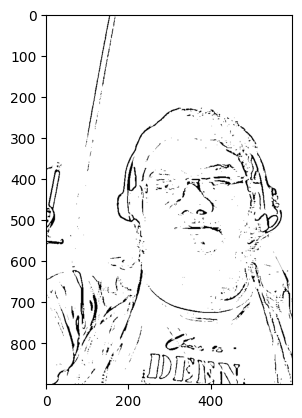

In [120]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)
edges = clean_edges(edges)

plt.imshow(edges, cmap = "gray")
plt.show()


In [121]:
## Reduce the color palette

In [122]:
from logging import critical
def color_quantization(img, k):

  # Transform the Image
  data = np.float32(img).reshape((-1,3))

  # Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  # Implementing K-Means

  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

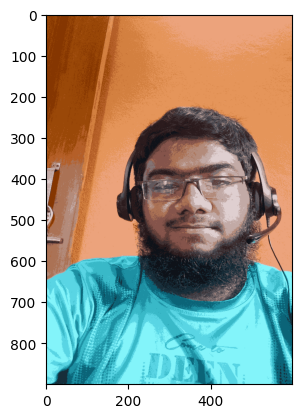

In [123]:
im = color_quantization(img, k=24)
plt.imshow(im)
plt.show()

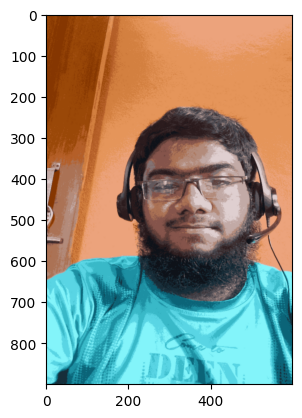

In [124]:
# reduce the noise

blurred = cv2.bilateralFilter(im, d=3, sigmaColor=300, sigmaSpace=300)
plt.imshow(blurred)
plt.show()



In [125]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask=edges)
  kernel = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])
  sharpened = cv2.filter2D(c, -1, kernel)
  plt.title("Sharpened Cartoon Image")
  plt.imshow(sharpened)
  plt.axis('off')
  plt.show()
  plt.title("Original Image")
  plt.imshow(org_img)
  plt.axis('off')
  plt.show()

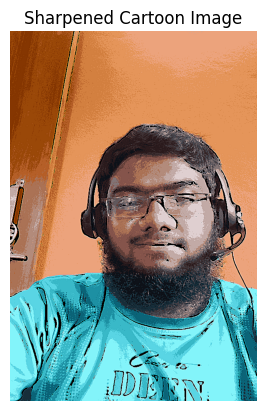

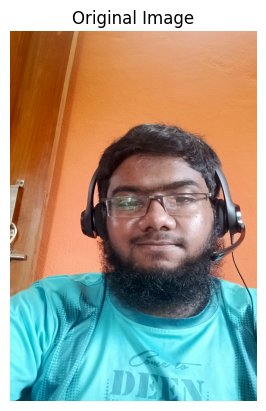

In [126]:
cartoon()